<a href="https://colab.research.google.com/github/DLesmes/ICETEX/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Carga de librerías y archivos ICETEX

In [ ]:
##TODO SE CORRE EN LOCAL, LOS ARCHIVOS BASE DE ICETEX DEBEN ESTAR GUARDADOS EN C:

! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
! pip install --upgrade plotly
! pip install --upgrade plotly.express
! pip install -q xlrd
! pip install quilt
from pandas_profiling      import ProfileReport
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt
import plotly.express        as px
import plotly.graph_objects  as go


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258957 sha256=166a60d369925732bedf7518273205fbe48cf8442ca7b4174319f20518484af6
  Stored in directory: C:\Users\elkcuepa\AppData\Local\Temp\pip-ephem-wheel-cache-hcngboyk\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling
Requirement already up-to-date: plotly in c:\programdata\anaconda3\lib\site-packages (4.13.0)
  Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)


In [ ]:
icetex_t = 'C:/Users/elkcuepa/Documents/Prejuridico/AcunNovedades_Total hasta 17-11-2020.xlsx'
icetex_total = pd.read_excel(icetex_t)
icetex_total.drop(['SI(Y(B3=B2;C3=C2;D3="";D2<>"");1;0)'], axis= 1, inplace= True)
icetex_total.drop(['Unnamed: 104'], axis= 1, inplace= True)
icetex_v = 'C:/Users/elkcuepa/Documents/Prejuridico/AcunNovedades_vinculo tota hasta 17-11-2020.xlsx'
icetex_vin = pd.read_excel(icetex_v)
icetex_s = 'C:/Users/elkcuepa/Documents/Prejuridico/Actualizacion_Saldos_Asignacion_11_20201118.xlsx'
icetex_sald = pd.read_excel(icetex_s)
icetex_p = 'C:/Users/elkcuepa/Documents/Prejuridico/(04) Acuerdos_de_Pago20201118.xlsx'
icetex_pag = pd.read_excel(icetex_p)
icetex_g = 'C:/Users/elkcuepa/Documents/Prejuridico/Reporte_Gestion_Vinculo_TOTAL 2020 AMERICAS.xlsx'
icetex_gest = pd.read_excel(icetex_g)
icetex_g1 = 'C:/Users/elkcuepa/Documents/Prejuridico/Gestion vinculo 2019-1.xlsx'
icetex_gest1 = pd.read_excel(icetex_g1)
icetex_g2 = 'C:/Users/elkcuepa/Documents/Prejuridico/Gestion vinculo 2019-2.xlsx'
icetex_gest2 = pd.read_excel(icetex_g2)
icetex_f = 'C:/Users/elkcuepa/Documents/Prejuridico/Actualizacion_Fosyga_11_20201118.xlsx'
icetex_fos = pd.read_excel(icetex_f)
icetex_r = 'C:/Users/elkcuepa/Documents/Prejuridico/Recaudo_11_20201118.xlsx'
icetex_rec = pd.read_excel(icetex_r)

In [ ]:
icetex_total.drop_duplicates(subset =['IDSOLICITUD'], inplace= True)
icetex_total['IDSOLICITUD']=icetex_total['IDSOLICITUD'].astype(int)
icetex_total.reset_index()
icetex_total.shape


(238899, 103)

In [ ]:
icetex_total['Origen']= icetex_total['Origen'].str.upper()
icetex_total['IES'] = icetex_total['IES'].replace('SNIES PARA DEPURAR',np.nan)
icetex_total['NOMBREPROGRAMA'] = icetex_total['NOMBREPROGRAMA'].replace('PROGRAMAS SIN DEPURAR',np.nan)


## Cruce de datos entre tablas con PK "IDSOLICITUD" con archivo ACUN

In [ ]:
icetex_vin1 = icetex_vin[['IDSOLICITUD','FECHASALIDA','FECHAACTUALIZACION']]
icetex_vin2 = icetex_vin[['IDSOLICITUD','SALDOTOTALMORA1_ACT','SALDOTOTAL_ACT','NUMDIASMORA_ACT']]
icetex_total[["FECHASALIDA","FECHAACTUALIZACION"]] = pd.merge(icetex_total,icetex_vin1,on=["IDSOLICITUD"],how="left")[["FECHASALIDA_y","FECHAACTUALIZACION_y"]]
icetex_total[["SALDOTOTALMORA1_ACT","SALDOTOTAL_ACT", "NUMDIASMORA_ACT"]] = pd.merge(icetex_total,icetex_vin2,on=["IDSOLICITUD"],how="left")[["SALDOTOTALMORA1_ACT_y","SALDOTOTAL_ACT_y","NUMDIASMORA_ACT_y"]]


In [ ]:
 icetex_sald.rename(columns={'SALDOTOTALMORA1': 'SALDOTOTALMORA1_ACT',
                             'SALDOTOTAL':'SALDOTOTAL_ACT',
                             'NUMDIASMORA_DEF': 'NUMDIASMORA_ACT',
                             'FechaNacimiemto': 'FECHANACIMIENTO'}, inplace=True)

In [ ]:
icetex_total.loc[icetex_total.IDSOLICITUD.isin(icetex_total.IDSOLICITUD), 
                 ['SALDOTOTALMORA1_ACT', 'SALDOTOTAL_ACT','NUMDIASMORA_ACT','FECHANACIMIENTO']] = icetex_sald[['SALDOTOTALMORA1_ACT', 'SALDOTOTAL_ACT','NUMDIASMORA_ACT','FECHANACIMIENTO']]


In [ ]:
icetex_sald1 = icetex_sald[['IDSOLICITUD','Rangodiasmora','CONCEPTO','VICT_HECHO_VICTIMIZANTE','SISBEN_PUNTAJE_2020', 'POBLACION_VULNERABLE','FOLIO_REDUNIDOS','INDIGENA_REGISTRO']]
icetex_total = pd.merge(icetex_total,icetex_sald1,on=['IDSOLICITUD'],how="left")

In [ ]:
icetex_pag1 = icetex_pag.sort_values('Fecha Acuerdo').drop_duplicates('Id Solicitud',keep='last')

In [ ]:
icetex_pag1.rename(columns={'Id Solicitud': 'IDSOLICITUD',
                            'Estado':'ESTADO_ACUERDO',
                            'Fecha Acuerdo':'FECHA_ACUERDO',
                            'Tipo Acuerdo':'TIPO_ACUERDO',
                             'Cuotas Pagadas':'CUOTAS_PAGADAS_ACUERDO',
                             'Cuotas Mora': 'CUOTAS_MORA_ACUERDO',
                             'Cuotas Futuras':'CUOTAS_FUTURAS_ACUERDO',
                             'Nombres': 'NOMBRES',
                             'Apellidos':'APELLIDOS',
                             'Id Solicitante': 'IDSOLICITANTE'}, inplace=True)

In [ ]:
icetex_pag2 = icetex_pag1[['IDSOLICITUD','FECHA_ACUERDO', 'ESTADO_ACUERDO', 'TIPO_ACUERDO', 'CUOTAS_PAGADAS_ACUERDO', 'CUOTAS_MORA_ACUERDO', 'CUOTAS_FUTURAS_ACUERDO','fecha Venc Cuota Vigente','Valor Cuota Vigente']]
icetex_total = pd.merge(icetex_total,icetex_pag2,on=['IDSOLICITUD'],how="left")

In [ ]:
acuerdo = icetex_pag.pivot_table(index=['Id Solicitud'], aggfunc='size')
acuerdo = acuerdo.reset_index()
acuerdo.rename(columns={'Id Solicitud': 'IDSOLICITUD'}, inplace=True)
icetex_total = pd.merge(icetex_total,acuerdo,on=['IDSOLICITUD'],how="left")

In [ ]:
icetex_total.rename(columns={0: 'No. ACUERDOS DE PAGO'}, inplace=True)

In [ ]:
icetex_fos1 = icetex_fos[['IDSOLICITUD','RazonSocial', 'TelEmpleador', 'UltimoPeriodoCotizado', 'FechaFosyga']]
icetex_total = pd.merge(icetex_total,icetex_fos1,on=['IDSOLICITUD'],how="left")

In [ ]:
icetex_rec1 = icetex_rec[['IDSOLICITUD','FECHA DEL RECAUDO DEL ARCHIVO', 'VALOR DEL RECAUDO']]
icetex_total = pd.merge(icetex_total,icetex_rec1,on=['IDSOLICITUD'],how="left")

In [ ]:
icetex_total= icetex_total.drop(['IDDEPNACIMIENTO', 'IDMUNNACIMIENTO', 'IDDEPRESIDENCIA','IDMUNRESIDENCIA','IDLOCALIDAD',
                   'FECHA','USUARIO','CODSNIES_INSTFIN','CODSNIES_PROGFIN','IDDEPRESIDENCIA1','IDMUNRESIDENCIA1',
                   'FECHAMODIFICADO','INDICATIVO','TIPOIDCODEUDOR','FECHA1','USUARIO1','FECEXPIDENTIFICACION',
                   'IDDEPEXPIDENTIFICACION','IDMUNEXPIDENTIFICACION','TIPOACTIVIDADECONOMICA','NOMBREEMPRESA','IDDEPEMPRESA',
                   'IDMUNEMPRESA','INGRESOSNOOPERACIONALES','REFERENCIA','FECHAMODIFICADO1','INDICATIVO1'], axis=1)



In [ ]:
icetex_total['CONCEPTO']= icetex_total['CONCEPTO'].str.upper()

In [ ]:
icetex_total

,IDSOLICITUD,FECHAENTRADA,FECHASALIDA,FECHAACTUALIZACION,COD_LINEA,COD_SUBLINEA,COD_REFERENCIA,APELLIDOS,NOMBRES,TIPOID,...,CUOTAS_FUTURAS_ACUERDO,fecha Venc Cuota Vigente,Valor Cuota Vigente,No. ACUERDOS DE PAGO,RazonSocial,TelEmpleador,UltimoPeriodoCotizado,FechaFosyga,FECHA DEL RECAUDO DEL ARCHIVO,VALOR DEL RECAUDO
0,13,2020-10-20,NaT,2020-10-20,19.0,5.0,0198364533-6,MOLINA VILORIA,EDER ALEXANDER,2.0,...,0.0,2020-02-20,0.0,2.0,TECNOLOGICO DE ANTIOQUIA,4443700.0,2020-10,2020-10-01,NaT,NaN
1,23,2020-10-01,NaT,2020-10-01,19.0,5.0,0198364614-6,SANDOVAL LOPEZ,JOHANNA IVETH,2.0,...,NaN,NaT,NaN,NaN,CLINICA DEL CARIBE S A,3305281.0,2020-08,2020-10-01,NaT,NaN
2,33,2020-06-02,NaT,2020-06-02,19.0,5.0,0198330957-3,GONZALEZ MIRANDA,CELENIA CECILIA,2.0,...,NaN,NaT,0.0,1.0,ALIANZA CANADIENSE DE IDIOMAS SAS,0.0,2020-10,2020-10-01,NaT,NaN
3,39,2019-11-13,NaT,2019-11-13,19.0,5.0,1,CASTILLO RUANO,GLORIA MERCEDES,1.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
4,47,2020-04-27,NaT,2020-04-27,19.0,5.0,0198364711-8,MORALES PUCCINI,GLORIA ELENA,2.0,...,134.0,2020-02-20,0.0,1.0,LABORATORIO FRANCO COLOMBIANO LAFRANCOL S.A.S,6877700.0,2020-10,2020-10-01,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241578,5408486,2020-09-07,NaT,NaT,17.0,119.0,1705408486-3,MEDINA PANTOJA,DEIVIS,2.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
241579,5409074,2020-10-20,NaT,NaT,17.0,109.0,1705409074-5,KEVIN SEBASTIAN,PIRAGUA BARRERA,2.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
241580,5410057,2020-10-20,NaT,NaT,17.0,119.0,1705410057-2,DE LA CRUZ SANJUANELO,AQUILES,2.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
241581,5411780,2020-10-20,NaT,NaT,17.0,119.0,1705411780-9,MARIA ALEJANDRA,ROJAS HERRERA,2.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


## Archivos Gestion llamadas

In [ ]:
icetex_gest.rename(columns={'HORA': 'HORA_FIN',
                            'ID_SOLICITUD':'IDSOLICITUD',
                            }, inplace=True)
icetex_gest1.rename(columns={'ID_SOLICITUD':'IDSOLICITUD',
                            }, inplace=True)
icetex_gest2.rename(columns={'ID_SOLICITUD':'IDSOLICITUD',
                            }, inplace=True)

In [ ]:
df_all = [icetex_gest,icetex_gest1,icetex_gest2 ]
icetex_gest_tot= pd.concat(df_all, axis=0)
icetex_gest_tot.head()

,IDSOLICITUD,CANAL,AGENTE,FECHA_INICIO,FECHA_FIN,HORA_FIN,CONTACTO_INICIAL_1,TIPO_DE_LLAMADA,RESULTADO_NIVEL1,RESULTADO_NIVEL2,RESULTADO_NIVEL3,RESULTADO_NIVEL4
0,288,IN,jmarino,2020-01-02,2020-01-02,NaN,3104113668,Fijo a celular,NO CONTACTADO,BUZON,NaN,NaN
1,1350,OUT,gerazo,2020-01-02,2020-01-02,NaN,3043808617,Fijo a celular,EFECTIVO,REALIZA ACUERDO DE PAGO,NORMALIZACIÓN,NaN
2,1414,OUT,EMacana,2020-01-02,2020-01-02,NaN,3226193011,Fijo a celular,OTROS,CAIDA,NaN,NaN
3,1794,IN,cruiz,2020-01-02,2020-01-02,NaN,56672221,Fijo a celular,NO CONTACTADO,BUZON,NaN,NaN
4,2345,OUT,potalora,2020-01-02,2020-01-02,NaN,13482381,Fijo a celular,NO EFECTIVO,NO LO CONOCEN,NaN,NaN


In [ ]:
icetex_gest_tot[['CANAL','AGENTE','RESULTADO_NIVEL1','RESULTADO_NIVEL2',
                 'RESULTADO_NIVEL3','RESULTADO_NIVEL4' ]] = icetex_gest_tot[['CANAL','AGENTE','RESULTADO_NIVEL1','RESULTADO_NIVEL2',
                                                                             'RESULTADO_NIVEL3','RESULTADO_NIVEL4' ]].apply(lambda x: x.str.upper())
icetex_gest_tot[['AGENTE','RESULTADO_NIVEL1','RESULTADO_NIVEL2',
                 'RESULTADO_NIVEL3','RESULTADO_NIVEL4' ]] = icetex_gest_tot[['AGENTE','RESULTADO_NIVEL1','RESULTADO_NIVEL2',
                                                                             'RESULTADO_NIVEL3','RESULTADO_NIVEL4' ]].apply(lambda x: x.str.strip())


In [ ]:
icetex_gest_tot=icetex_gest_tot[pd.to_numeric(icetex_gest_tot['IDSOLICITUD'], errors='coerce').notnull()]

In [ ]:
icetex_llam = pd.DataFrame(icetex_gest_tot.groupby(['IDSOLICITUD', 'RESULTADO_NIVEL1']).count()['CANAL'].unstack())
icetex_llam=icetex_llam.reset_index()


In [ ]:
icetex_tot1 = icetex_total[['IDSOLICITUD','Origen','FECHANACIMIENTO', 'SEXO','CONCEPTO']]
icetex_gest_tot = pd.merge(icetex_gest_tot,icetex_tot1,on=['IDSOLICITUD'],how="left")

In [ ]:
icetex_gest_tot

,IDSOLICITUD,CANAL,AGENTE,FECHA_INICIO,FECHA_FIN,HORA_FIN,CONTACTO_INICIAL_1,TIPO_DE_LLAMADA,RESULTADO_NIVEL1,RESULTADO_NIVEL2,RESULTADO_NIVEL3,RESULTADO_NIVEL4,Origen,FECHANACIMIENTO,SEXO,CONCEPTO
0,288,IN,JMARINO,2020-01-02,2020-01-02,NaN,3104113668,Fijo a celular,NO CONTACTADO,BUZON,NaN,NaN,PREJURIDICO,1981-10-30,F,NaN
1,1350,OUT,GERAZO,2020-01-02,2020-01-02,NaN,3043808617,Fijo a celular,EFECTIVO,REALIZA ACUERDO DE PAGO,NORMALIZACIÓN,NaN,CASTIGO,1985-12-14,M,MILLENNIALS
2,1414,OUT,EMACANA,2020-01-02,2020-01-02,NaN,3226193011,Fijo a celular,OTROS,CAIDA,NaN,NaN,PREJURIDICO,NaT,F,NaN
3,1794,IN,CRUIZ,2020-01-02,2020-01-02,NaN,56672221,Fijo a celular,NO CONTACTADO,BUZON,NaN,NaN,CASTIGO,1979-10-22,M,MILLENNIALS
4,2345,OUT,POTALORA,2020-01-02,2020-01-02,NaN,13482381,Fijo a celular,NO EFECTIVO,NO LO CONOCEN,NaN,NaN,CASTIGO,1983-02-08,M,MILLENNIALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703343,1827956,IN,WHERNANDEZ,2019-11-08,NaT,NaN,3133240999,NaN,EFECTIVO,PROGRAMACIÓN DE LLAMADA,NaN,NaN,PREJURIDICO,1996-04-04,M,NaN
1703344,1704088,IN,GFUENTES,2019-11-08,NaT,NaN,3125743120,NaN,EFECTIVO,CRÉDITO ADMINISTRATIVO,NaN,NaN,PREJURIDICO,NaT,NaN,NaN
1703345,1804051,IN,PBENAVIDES,2019-11-08,NaT,NaN,3114249546,NaN,OTROS,CAIDA,NaN,NaN,PREJURIDICO,1987-01-24,F,NaN
1703346,1622311,OUT,ACASTANO,2019-11-08,NaT,NaN,3114420186,Fijo a celular,OTROS,CAIDA,NaN,NaN,CASTIGO,NaT,F,MILLENNIALS


## **Seleccionar Cartera Prejurídico o Castigo**

In [ ]:
icetex_total_prej = icetex_total[(icetex_total['Origen']=='PREJURIDICO')]
icetex_total_cast = icetex_total[(icetex_total['Origen']=='CASTIGO')]
#Para seleccionar una de las carteras, de aquí en adelante se reemplaza la variable "icetex_total" por: 
# "icetex_total_prej" para PREJURIDICO
# "icetex_total_cast" para CASTIGO
icetex_gest_prej = icetex_gest_tot[(icetex_gest_tot['Origen']=='PREJURIDICO')]
icetex_gest_cast = icetex_gest_tot[(icetex_gest_tot['Origen']=='CASTIGO')]
#lo mismo para el caso del archivo de llamadas "icetex_gest_tot", solo que aquí aparecen valores nulos,
# ya que vienen concatenados de "icetex_total"

In [ ]:
icetex_total_prej

,IDSOLICITUD,FECHAENTRADA,FECHASALIDA,FECHAACTUALIZACION,COD_LINEA,COD_SUBLINEA,COD_REFERENCIA,APELLIDOS,NOMBRES,TIPOID,...,CUOTAS_FUTURAS_ACUERDO,fecha Venc Cuota Vigente,Valor Cuota Vigente,No. ACUERDOS DE PAGO,RazonSocial,TelEmpleador,UltimoPeriodoCotizado,FechaFosyga,FECHA DEL RECAUDO DEL ARCHIVO,VALOR DEL RECAUDO
0,13,2020-10-20,NaT,2020-10-20,19.0,5.0,0198364533-6,MOLINA VILORIA,EDER ALEXANDER,2.0,...,0.0,2020-02-20,0.0,2.0,TECNOLOGICO DE ANTIOQUIA,4443700.0,2020-10,2020-10-01,NaT,NaN
2,33,2020-06-02,NaT,2020-06-02,19.0,5.0,0198330957-3,GONZALEZ MIRANDA,CELENIA CECILIA,2.0,...,NaN,NaT,0.0,1.0,ALIANZA CANADIENSE DE IDIOMAS SAS,0.0,2020-10,2020-10-01,NaT,NaN
16,180,2020-05-12,NaT,2020-05-12,19.0,5.0,0198391786-7,ORTIZ CORDOBA,DAISY LORENA,2.0,...,NaN,NaT,0.0,5.0,CLINICA DE CIRUGIA AMBULATORIA CONQUISTADORES ...,6052252.0,2020-10,2020-10-01,NaT,NaN
18,209,2020-08-10,2020-10-07,2020-10-07,19.0,5.0,0190197034-1,ROJAS SILVA,ALBA INES,2.0,...,NaN,NaT,0.0,6.0,NaN,NaN,NaN,NaT,NaT,NaN
24,281,2020-04-21,NaT,2019-11-13,19.0,5.0,0198342041-5,ESTUPINAN SANTANA,YORLIS MARLEY,2.0,...,NaN,NaT,0.0,8.0,DARSALUD,6959990.0,2020-10,2020-10-01,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241578,5408486,2020-09-07,NaT,NaT,17.0,119.0,1705408486-3,MEDINA PANTOJA,DEIVIS,2.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
241579,5409074,2020-10-20,NaT,NaT,17.0,109.0,1705409074-5,KEVIN SEBASTIAN,PIRAGUA BARRERA,2.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
241580,5410057,2020-10-20,NaT,NaT,17.0,119.0,1705410057-2,DE LA CRUZ SANJUANELO,AQUILES,2.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
241581,5411780,2020-10-20,NaT,NaT,17.0,119.0,1705411780-9,MARIA ALEJANDRA,ROJAS HERRERA,2.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


##Profiling de Variables Demográficas

In [ ]:
icetex_demog = icetex_total_prej[['IDSOLICITUD','NOMBRES', 'APELLIDOS','IDSOLICITANTE','SEXO','FECHANACIMIENTO','CONCEPTO','ESTADOCIVIL','DEPTORESIDENCIA',
                               'MUNICRESIDENCIA','TERRITORIAL','IES','NOMBREPROGRAMA','NIVELDEFORMACION','ESTRATO','TELEFONORESIDENCIA',
                               'TELEDONO1','TELEDONO2','TELEDONO3','EMAIL','NIVELSISBEN','IDCODEUDOR','APELLIDOCODEUDOR','UltimoPeriodoCotizado',
                               'NOMBRECODEUDOR','DIRECCIONCODEUDOR','TELEFONOCODEUDOR','POBLACION_VULNERABLE','FOLIO_REDUNIDOS','INDIGENA_REGISTRO'
                               ]]

In [ ]:
profile = ProfileReport(icetex_demog, title="Icetex Profiling Report")
profile.to_notebook_iframe()

# Profiling de Variables Socioeconómicas

In [ ]:
icetex_socioeco = icetex_total_prej[['IDSOLICITUD','Origen','NROCUOTASMORA','NUMDIASMORA_ACT','VALORCUOTA','SALDOTOTALMORA1_ACT','SALDOTOTAL_ACT',
                                'CALIFICACIONACTUAL','SALDOINICIAAMORT','LINEA','SUBLINEA', 'CUOTAS_FUTURAS_ACUERDO',
                                'ESTADO_ACUERDO', 'TIPO_ACUERDO', 'CUOTAS_PAGADAS_ACUERDO', 'CUOTAS_MORA_ACUERDO',
                                'No. ACUERDOS DE PAGO','VALOR DEL RECAUDO']]

In [ ]:
profile = ProfileReport(icetex_socioeco, title="Icetex Profiling Report")
profile.to_notebook_iframe()

count    5.912800e+04
mean     4.444124e+06
std      9.528313e+06
min      5.095290e+03
25%      1.014058e+06
50%      2.141933e+06
75%      4.808845e+06
max      6.351982e+08
Name: SALDOTOTALMORA1_ACT, dtype: float64


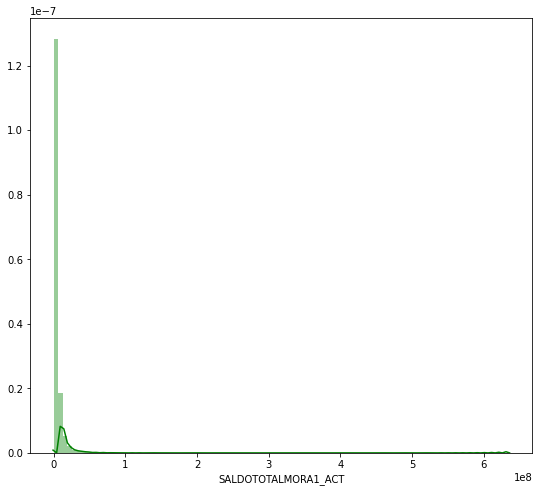

In [ ]:
print(icetex_total_prej['SALDOTOTALMORA1_ACT'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(icetex_total_prej['SALDOTOTALMORA1_ACT'], color='g', bins=100, hist_kws={'alpha': 0.4})

# Profiling Variables de Negocio

In [ ]:
profile = ProfileReport(icetex_gest_prej, title="Icetex Profiling Report")
profile.to_notebook_iframe()

# Profiling Variables Temporales

In [ ]:
icetex_temp = icetex_total_prej[['FECHAENTRADA','FECHASALIDA','FECHAACTUALIZACION','FECHAMORADESDE',
                            'VCTO_CUOTA1','FECHAULTPAGO','FECHA_ACUERDO','fecha Venc Cuota Vigente']]

In [ ]:
profile = ProfileReport(icetex_temp, title="Icetex Profiling Report")
profile.to_notebook_iframe()

## Relación de datos